# REPLICATION ASSIGMENT
# MARCELA DE CASTRO VALDERRAMA

## Paper: Trading Population for Productivity: Theory and Evidence , 2008
## Authors: Oded Galor, Andew Mountford

### General Description of this Notebook:
The codes used here are elaborated by Marcela De Castro based on the Stata do file from the authors. The data base and Stata do file is found in [Galor's official cite](https://www.brown.edu/Departments/Economics/Faculty/Oded_Galor/data.html). The archive downloaded contains the main regressions done in the paper. Graphs are not included, their replication are my own.

In this Notebook, text written with _italic_ is used for economic analysis based on the theory and explanations of the authors in the paper. Text writen without italic is for code explanation. Additionally, codes are explained with comments.

## Setting work tools

Import all necessary packages:

In [1]:
from __future__ import division
%pylab --no-import-all
%matplotlib inline   
    
import pandas as pd
import numpy as np
import os

import matplotlib as mpl
import seaborn as sns
# Setup seaborn
sns.set()

import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels.iv import IV2SLS
from linearmodels.iv import compare
from collections import OrderedDict
from linearmodels.datasets import meps

from sklearn import datasets
from stargazer.stargazer import Stargazer
from IPython.display import Latex

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


### Setting Directories

In [2]:
    #Set Directories for data
pathout = './DataFiles/'
    #If the directory does not exist, then create it
if not os.path.exists(pathout):
       os.mkdir(pathout)
    print(pathout,"folder created")
        # You need to have the data base, so if this folder was created then 
        # you might be missing the database, so a Warning is added
    print("WARNING! Make sure you have the data file in this folder") 

./DataFiles/ folder created
WARNING! Make sure you have the data file in this folder


In [3]:
    #Set Directories for Graphs 
pathgraphs = './Graphs/'
if not os.path.exists(pathgraphs):
       os.mkdir(pathgraphs)
       print(pathout,"folder created")
        #I aded a print function just to be sure that if the folder
        # didn't exist, It is now created

### Import Data Base

In [4]:
    #Import Data Base
Data = pd.read_stata(pathout + 'GMountRES.dta')
    # Using Pandas, we can import the database
    # Name "Data" the stata file named GMountRES.dta' found in the path declared before

### Housekeeping

In [5]:
    #Lets see what was imported
Data

,code,country,africa,asia,europe,paci,america,totalfert85,totalfert90,totfert95,...,pyr1585,pyr1590,logactualtrade,logfrankrom,logrgdppc1985,oecd85,opec85,easteur,logarea,logpop
0,DZA,Algeria,1,0,0,0,0,5.29,4.13,2.88,...,2.398,2.798,3.905200,2.637,8.002359,0,1,0,6.823933,1.580833
1,AGO,Angola,1,0,0,0,0,7.20,7.10,6.90,...,-999.000,-999.000,4.235555,2.443,6.566672,0,0,0,6.176603,1.256186
2,ARG,Argentina,0,0,0,0,1,3.05,2.90,2.63,...,5.397,5.985,2.839078,1.723,8.579980,0,0,0,6.977344,2.379361
3,AUS,Australia,0,0,0,1,0,1.87,1.87,1.77,...,6.546,6.535,3.563316,1.404,9.516574,1,0,0,7.995020,2.000263
4,AUT,Austria,0,0,1,0,0,1.45,1.47,1.36,...,3.650,3.637,4.397777,3.601,9.317490,1,0,0,3.477386,1.260731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,VUT,Vanuatu,0,0,0,1,0,5.04,4.83,4.59,...,-999.000,-999.000,4.814864,3.429,7.511525,0,0,0,1.549051,-3.170086
140,VEN,Venezuela,0,0,0,0,1,3.65,3.25,2.94,...,3.902,3.594,3.707701,2.191,8.736329,0,1,0,5.864038,1.755960
141,YEM,Yemen,0,1,0,0,0,8.30,7.60,6.88,...,0.617,1.066,3.898735,2.823,7.361375,0,0,0,4.856396,0.862468
142,ZMB,Zambia,1,0,0,0,0,6.66,6.35,6.03,...,3.556,3.662,4.343286,2.625,6.694562,0,0,0,5.671900,0.821540


**Rename Variables**

To make easier the understanding of what the variables in the database, some of them are renamed.

In [6]:
Data.rename(columns={'code':'CtrCode'}, inplace=True)

Data.rename(columns={'tyr1585':'Educyears85tot'}, inplace=True)
Data.rename(columns={'tyr1590':'Educyears90tot'}, inplace=True)
Data.rename(columns={'tyr1595':'Educyears95tot'}, inplace=True)
Data.rename(columns={'tyr1599':'Educyears99tot'}, inplace=True)

Data.rename(columns={'pyr1585':'Educyears85prim'}, inplace=True)
Data.rename(columns={'pyr1590':'Educyears90prim'}, inplace=True)

Data.rename(columns={'logpop':'lnpop'}, inplace=True)

In [7]:
Data[['Educyears85tot','Educyears90tot','Educyears95tot']].describe()

,Educyears85tot,Educyears90tot,Educyears95tot
count,144.000000,144.000000,144.000000
mean,-273.819214,-259.592651,-280.201172
std,451.313843,444.265106,455.092621
min,-999.000000,-999.000000,-999.000000
25%,-999.000000,-999.000000,-999.000000
50%,3.448500,3.985000,4.475500
75%,5.911250,6.265750,6.831250
max,11.569000,11.742000,11.892000


#### Descriptive Statistics 
This part of the code is not part of the original paper. Nevertheless, its always usefull for getting to know the data that is going to be used.

In [8]:
Data.describe()

,africa,asia,europe,paci,america,totalfert85,totalfert90,totfert95,crudebirth85,infmort85,...,Educyears85prim,Educyears90prim,logactualtrade,logfrankrom,logrgdppc1985,oecd85,opec85,easteur,logarea,lnpop
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.333333,0.208333,0.187500,0.055556,0.215278,4.342638,3.993472,3.642292,31.498610,58.673611,...,-274.986053,-260.938477,4.093109,2.946278,7.871720,0.166667,0.083333,0.041667,4.033285,0.902725
std,0.473050,0.407534,0.391675,0.229861,0.412450,1.993310,1.889370,1.829681,12.894369,45.335575,...,450.583923,443.452271,0.643546,0.786632,1.061090,0.373979,0.277350,0.200524,2.278812,1.969231
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,1.220000,1.060000,9.900000,4.900000,...,-999.000000,-999.000000,2.577182,0.833000,5.700444,0.000000,0.000000,0.000000,-2.103734,-3.506558
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.380000,2.160000,1.985000,19.325000,17.075000,...,-999.000000,-999.000000,3.723361,2.441000,6.999711,0.000000,0.000000,0.000000,2.773584,-0.280092
50%,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000,3.805000,3.180000,31.550000,49.450001,...,2.439500,2.754500,4.140511,2.970500,7.798466,0.000000,0.000000,0.000000,4.515093,1.017398
75%,1.000000,0.000000,0.000000,0.000000,0.000000,6.162500,5.662500,5.040000,42.275001,98.549999,...,4.026000,4.318500,4.502928,3.438000,8.736208,0.000000,0.000000,0.000000,5.591997,1.989943
max,1.000000,1.000000,1.000000,1.000000,1.000000,8.300000,8.180000,8.150000,58.099998,179.899994,...,7.604000,7.704000,5.762271,5.639000,9.885731,1.000000,1.000000,1.000000,9.059563,7.829630


## Generating New Variables 
**We need to create some extra variables used in the paper**

**Fertility variables**

In [9]:
#Variable totalfert8590:
    #The average fertility rate between 1985 to 1990
Data['totalfert8590'] = (Data['totalfert85'] + Data['totalfert90'])/2

#Variable totalfert8595:
    #The average fertility rate between 1985 to 1995
Data['totalfert8595'] = (Data['totalfert85'] + Data['totalfert90'] + Data['totfert95'])/3

#Variable of Infant Mortality separated by OECD and Non-OECD countries
Data['intinfmort85'] = (Data['infmort85']*Data['oecd85']) 



In [10]:
#Lets see the descriptive statistics of the new variables
Data[['totalfert8590','totalfert8595','intinfmort85']].describe()

,totalfert8590,totalfert8595,intinfmort85
count,144.000000,144.000000,144.000000
mean,4.168056,3.992801,1.814583
std,1.934161,1.888721,6.542609
min,1.265000,1.196667,0.000000
25%,2.227500,2.150833,0.000000
50%,4.077500,3.750000,0.000000
75%,5.931250,5.633333,0.000000
max,8.190001,8.176667,70.199997


**Education Variables**

In [11]:
    #Generate capital accummulation in different time windows (used for robustness checks)
Data['D_educy'] = (Data['Educyears90tot']-Data['Educyears85tot']) 
Data['D_educy95'] = (Data['Educyears95tot']-Data['Educyears85tot']) 
Data['D_educy99'] = (Data['Educyears99tot']-Data['Educyears85tot']) 

Data['D_educyprimary'] = (Data['Educyears90prim']-Data['Educyears85prim']) 



In [12]:
Data['D_educyprimary'].describe()

count     144.000000
mean       14.047619
std       117.491325
min        -0.526000
25%         0.000000
50%         0.052500
75%         0.285250
max      1000.976013
Name: D_educyprimary, dtype: float64

In [13]:
dataTypeSeries = Data.dtypes
print(dataTypeSeries)

CtrCode             object
country             object
africa                int8
asia                  int8
europe                int8
paci                  int8
america               int8
totalfert85        float32
totalfert90        float32
totfert95          float32
crudebirth85       float32
infmort85          float32
Educyears85tot     float32
Educyears90tot     float32
Educyears95tot     float32
Educyears99tot     float32
Educyears85prim    float32
Educyears90prim    float32
logactualtrade     float32
logfrankrom        float32
logrgdppc1985      float32
oecd85                int8
opec85                int8
easteur               int8
logarea            float32
lnpop              float32
totalfert8590      float32
totalfert8595      float32
intinfmort85       float32
D_educy            float32
D_educy95          float32
D_educy99          float32
D_educyprimary     float32
dtype: object


In [14]:
Data['oecd85'] = Data['oecd85'].astype(np.float32)
Data['opec85'] = Data['opec85'].astype(np.float32)

Data['easteur'] = Data['easteur'].astype(np.float32)
Data['africa'] = Data['africa'].astype(np.float32)
Data['paci'] = Data['paci'].astype(np.float32)
Data['asia'] = Data['asia'].astype(np.float32)
Data['america'] = Data['america'].astype(np.float32)
Data['europe'] = Data['europe'].astype(np.float32)
dataTypeSeries = Data.dtypes
print(dataTypeSeries)

CtrCode             object
country             object
africa             float32
asia               float32
europe             float32
paci               float32
america            float32
totalfert85        float32
totalfert90        float32
totfert95          float32
crudebirth85       float32
infmort85          float32
Educyears85tot     float32
Educyears90tot     float32
Educyears95tot     float32
Educyears99tot     float32
Educyears85prim    float32
Educyears90prim    float32
logactualtrade     float32
logfrankrom        float32
logrgdppc1985      float32
oecd85             float32
opec85             float32
easteur            float32
logarea            float32
lnpop              float32
totalfert8590      float32
totalfert8595      float32
intinfmort85       float32
D_educy            float32
D_educy95          float32
D_educy99          float32
D_educyprimary     float32
dtype: object


**Regional Dummies by OECD country differenciation**

Here the regional dummy is multiplied by the OECD dummy. If both are 1 then the new var = 1 meaning the country is a OECD country of the specified region

In [15]:
Data['intafrica'] = (Data['africa']*Data['oecd85'])
Data['intasia'] = (Data['africa']*Data['oecd85'])
Data['intpaci'] = (Data['africa']*Data['oecd85'])
Data['intamerica'] = (Data['africa']*Data['oecd85'])
Data['inteurope'] = (Data['africa']*Data['oecd85'])

**Trade variables**

In [16]:
Data['intlogrgdppc1985'] = (Data['logrgdppc1985']*Data['oecd85'])
Data['intlogactualtrade'] = (Data['logactualtrade']*Data['oecd85'])
Data['intlogfrankrom'] = (Data['logfrankrom']*Data['oecd85'])
Data['intlogarea'] = (Data['logarea']*Data['oecd85'])
Data['intlnpop'] = (Data['lnpop']*Data['oecd85'])

In [17]:
Data[['intlogrgdppc1985','intlogactualtrade','intlogfrankrom','intlogarea','intlnpop']].describe()

,intlogrgdppc1985,intlogactualtrade,intlogfrankrom,intlogarea,intlnpop
count,144.000000,144.000000,144.000000,144.000000,144.000000
mean,1.545975,0.692652,0.483632,0.748971,0.288931
std,3.472481,1.569036,1.152724,1.841770,0.927118
min,0.000000,0.000000,0.000000,-0.001001,-2.063568
25%,0.000000,0.000000,0.000000,0.000000,-0.000000
50%,0.000000,0.000000,0.000000,0.000000,-0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.715349,5.356303,5.639000,8.256298,4.765263


## Creating sub-gropus within the database

_Authors main hypothesis is that trade makes the industrialized countries rises the demand on human capital to use the advance manufactored technology. Consecuently, this induce to a decline in fetility rate because quality is prefered and has greated benefits over quantity of children. On the other hand, in non industrialized economies, the opposite effect is obtained when countries are open to international trade. That means that in non industrial economies, international trade rises the fertility rate since the demand on human capital falls when the economy specializes in non manufactured goods due to it's comparative advantage producing agricultural less productive goods._

_The regressions done in the paper examine for empirical evidence on the effect of international trade on fertility rates and capital formation. For doing so, the sample is divided by OECD and non OECD members assuming that the OECD countries are more industrialized._ Databases that show this difference are created bellow.

##### Database free of missing values 
Some education variables are missing so we need a database that excludes those observations

In [18]:
df_educ = Data.loc[(Data.Educyears85tot>-999) & (Data.Educyears95tot>-999)].reset_index(drop=True)
print('Number of Countries in this DataSeries =',df_educ.shape[0],'.(i.e excluding education missings, there are',df_educ.shape[0],'countries')

Number of Countries in this DataSeries = 103 .(i.e excluding education missings, there are 103 countries


In [19]:
df_educ_prim = Data.loc[(Data.Educyears85prim>-999) & (Data.Educyears90prim>-999)].reset_index(drop=True)


##### OECD members databases

In [20]:
    #Data base for OECD members
df_ocde = Data.loc[Data.oecd85==1].reset_index(drop=True)
    # In a database called "df_ocde" get all observatios for which the oecd85 variable is equal to 1
    # That means, that if oecd85=1 the country was part of OECD in 1985 the drop=true means to drop
    # all observations for which variable oecd85 is different from 1
print('Number of Countries in this DataSeries =',df_ocde.shape[0],'.(i.e',df_ocde.shape[0],'countries that were OECD members in 1985)')

Number of Countries in this DataSeries = 24 .(i.e 24 countries that were OECD members in 1985)


We need to create even a smallest subgroup in the database with only the OECD members. Authors exclude the OPEC members, _Basically because the trade patterns of oil-rich countries since the revenues associated with the commodity production could potentially distort the relation between trade and fertility or trade and education._

In [21]:
    #Data base for OECD members - EXCLUDING OPEC members
df_ocde_nonopec = df_ocde.loc[df_ocde.opec85==0].reset_index(drop=True)
print('Number of Countries in this DataSeries =',df_ocde_nonopec.shape[0],'.(i.e',df_ocde_nonopec.shape[0],'countries that were OECD but no OPEC members in 1985)')

Number of Countries in this DataSeries = 24 .(i.e 24 countries that were OECD but no OPEC members in 1985)


In [22]:
    #Data base for non-OECD members - Excluding OPEC members and dropping education missings
dfeduc_ocde_nonopec = df_ocde_nonopec.loc[(df_ocde_nonopec.Educyears85tot>-999) & (df_ocde_nonopec.Educyears90tot>-999)].reset_index(drop=True)
print('Number of Countries in this DataSeries =',dfeduc_ocde_nonopec.shape[0],'.(i.e excluding education missings, there are',dfeduc_ocde_nonopec.shape[0],'countries that were OECD but not OPEC members in 1985)')

Number of Countries in this DataSeries = 23 .(i.e excluding education missings, there are 23 countries that were OECD but not OPEC members in 1985)


##### Non-OECD members databases

In [23]:
    #Data base for non-OECD members - includes OPEC members
df_nonocde = Data.loc[Data.oecd85==0].reset_index(drop=True)
    # This code does the opposite, here we are interested in dropping observations for which 
    # oecd85=0, meaning, the country was not a OECD member in 1985 
print('Number of Countries in this DataSeries =',df_nonocde.shape[0],'.(i.e',df_ocde.shape[0],'countries that were not OECD members in 1985)')

Number of Countries in this DataSeries = 120 .(i.e 24 countries that were not OECD members in 1985)


_Again, we need to do a subset of Non-OECD countries excluding OPEC country members for the reason explained above_

In [24]:
    #Data base for non-OECD members - Excluding OPEC members
df_nonocde_nonopec = df_nonocde.loc[df_nonocde.opec85==0].reset_index(drop=True)
print('Number of Countries in this DataSeries =',df_nonocde_nonopec.shape[0],'.(i.e',df_nonocde_nonopec.shape[0],'countries that were not OECD or OPEC members in 1985)')

Number of Countries in this DataSeries = 108 .(i.e 108 countries that were not OECD or OPEC members in 1985)


In [25]:
    #Data base for non-OECD members - Excluding OPEC members and dropping education missings
dfeduc_nonocde_nonopec = df_nonocde_nonopec.loc[(df_nonocde_nonopec.Educyears85tot>-999) & (df_nonocde_nonopec.Educyears90tot>-999)].reset_index(drop=True)
print('Number of Countries in this DataSeries =',dfeduc_nonocde_nonopec.shape[0],'.(i.e excluding education missings, there are',dfeduc_nonocde_nonopec.shape[0],'countries that were not OECD or OPEC members in 1985)')

Number of Countries in this DataSeries = 74 .(i.e excluding education missings, there are 74 countries that were not OECD or OPEC members in 1985)


## Regressions

### Table 1: The effect of trade on total fertility rate
    Here the authors want to se the effect of trade on the average total fertility rate between 1985-1990
    
The fisrt four estimations are for non-OECD countries and the expected effect of international trade on the demand for human capital induces a rise in fertility in non-industrial economies.

The latter four columns are for OECD countries and the expected effect of trade in fertility rates is, according to the theory, the opposite one.

#### For Non-OECD Countries: 

- Lets generate the first column: Using OLS to see the relationship of trade on fertility rates

In [26]:
    # Column 1
        #Regress the fertility rate of 1985 upon the logarithm of trade and controlling for GDP per capita
col1_table1 = smf.ols(formula='totalfert85 ~ logactualtrade + logrgdppc1985', data=df_nonocde_nonopec).fit(cov_type='HC1')
                # In a variable called "col1_table1" save the results provided by the command of statmodels ols
                # This command runs an Ordinary Least Squares regression following the formula specified where
                # the variable in the left side of ~ is the dependent variable and the variables (separated by a "+")
                # are the exogenous variables.
                # The data used here, is the subgroup of data for non-ocde countries and excluding OPEC members to
                # The input in the .fit() is the correction of standard errors when the presence of heteroscedasticity. 
  
        # The following command allow us to se the ANOVA table with the results of the main tests for the regression
col1_table1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.570   
Dependent Variable: totalfert85      AIC:                349.0704
Date:               2020-06-26 22:41 BIC:                357.1167
No. Observations:   108              Log-Likelihood:     -171.54 
Df Model:           2                F-statistic:        66.09   
Df Residuals:       105              Prob (F-statistic): 2.64e-19
R-squared:          0.578            Scale:              1.4432  
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept        16.3925   1.1363  14.4257 0.0000 14.1653 18.6197
logactualtrade    0.2094   0.1711   1.2239 0.2210 -0.1259  0.5448
logrgdppc1985    -1.6571   0.1448 -11.4426 0.0000 -1.9410 -1.3733
-----------------------------------------------------------------
Omnibus:              12.584       Durbin-Watson:          1.849 
Prob(Omnibus):        0.002        Jarque-Bera (JB):       18.060
Skew:                 0.562        Prob(JB):               0.000 
Kurtosis:             4.658        Condition No.:          81    
=================================================================

"""

_The results presented above predict there is a positive relation between trade and fertility rates in non industrialized countries, just like theory suggest. However, results are not statistically significant_

In [27]:
    # Column 2
        #Regress the fertility rate of 1985 upon the logarithm of trade and controlling for GDP per capita and infant mortality
col2_table1 = smf.ols(formula='totalfert85 ~ logactualtrade + logrgdppc1985 + infmort85', data=df_nonocde_nonopec).fit(cov_type='HC1')
col2_table1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.716   
Dependent Variable: totalfert85      AIC:                305.3441
Date:               2020-06-26 22:41 BIC:                316.0726
No. Observations:   108              Log-Likelihood:     -148.67 
Df Model:           3                F-statistic:        123.9   
Df Residuals:       104              Prob (F-statistic): 3.34e-34
R-squared:          0.724            Scale:              0.95413 
-----------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-----------------------------------------------------------------
Intercept           4.2800   2.3428  1.8269 0.0677 -0.3118 8.8718
logactualtrade      0.3319   0.1444  2.2980 0.0216  0.0488 0.6150
logrgdppc1985      -0.3868   0.2653 -1.4582 0.1448 -0.9068 0.1331
infmort85           0.0300   0.0047  6.4131 0.0000  0.0208 0.0391
-----------------------------------------------------------------
Omnibus:              13.368       Durbin-Watson:          1.843 
Prob(Omnibus):        0.001        Jarque-Bera (JB):       15.083
Skew:                 0.739        Prob(JB):               0.001 
Kurtosis:             4.080        Condition No.:          1651  
=================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

_Even controlling for the infant mortality, there is a positive relation between trade and fertility rates. Yet, there is potential existence of omitted variables, measurement errors, and reverse causality._ Authors use an instrument: The Frankel and Romer(1999) instrument.

**Notes on the Instrument:**
This instrument accounts for the country’s intrinsic propensity to trade. This instrument is is an aggregating index from thousands of bilateral trade relationships which are estimated using a regression of bilateral trade share in GDP on seven variables and some of their interactions. Some of this variables include distance between the two trading economies, a country area and commercial borders. 

Those variables should be exogenous since might not be correlated with the error term in the above regression that contain unobserved things determining fertility rate. On the other hand, this exogenous index does measure the capacity or potential capacity of trade for a country and thus, works as a relevant instrument.

In [28]:
    #Column 3
    # Run the IV regression without controlling for infant mortality
fstStage_col3_table1 = smf.ols(formula='logactualtrade ~ logfrankrom + logrgdppc1985', data=df_nonocde_nonopec).fit(cov_type='HC1')
df_nonocde_nonopec['predicted_lntrade_1_3'] = fstStage_col3_table1.predict()

scdStage_1_3 = smf.ols(formula='totalfert85 ~ predicted_lntrade_1_3 + logrgdppc1985', data=df_nonocde_nonopec).fit(cov_type='HC1')
scdStage_1_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
======================================================================
Model:                 OLS               Adj. R-squared:      0.591   
Dependent Variable:    totalfert85       AIC:                 343.7143
Date:                  2020-06-26 22:41  BIC:                 351.7607
No. Observations:      108               Log-Likelihood:      -168.86 
Df Model:              2                 F-statistic:         86.11   
Df Residuals:          105               Prob (F-statistic):  7.32e-23
R-squared:             0.599             Scale:               1.3734  
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
Intercept             15.4028   1.2535  12.2877 0.0000 12.9459 17.8596
predicted_lntrade_1_3  0.6935   0.2496   2.7788 0.0055  0.2044  1.1827
logrgdppc1985         -1.7896   0.1364 -13.1228 0.0000 -2.0568 -1.5223
----------------------------------------------------------------------
Omnibus:               11.460         Durbin-Watson:            1.863 
Prob(Omnibus):         0.003          Jarque-Bera (JB):         15.781
Skew:                  0.529          Prob(JB):                 0.000 
Kurtosis:              4.546          Condition No.:            87    
======================================================================

"""

In [29]:
    #Column 4
         # Run the first step of the regression    
fstStage_col4_table1 = smf.ols(formula='logactualtrade ~ logfrankrom + logrgdppc1985 + infmort85', data=df_nonocde_nonopec).fit(cov_type='HC1')
        # In the dataframe of nonOECD countries, exluding OPEC, create a new variable called "predicted_lntrade_1_4"
        # This variable is the predicted dependent variable generated in the regression called fstStage_col4_table1
        # which corresponds to the logarithm of trade which is being instrumented with the Frankel-Romer IV variable
        # and this first step also includes the controls which correspond to GDP per capita and the infant mortality
        
            # Predict the instrumented variable of interest to use it in the next step:
df_nonocde_nonopec['predicted_lntrade_1_4'] = fstStage_col4_table1.predict()
                # (This prediction will be used for generating figure 1)

        # Run the second step of the regression    
scdStage_1_4 = smf.ols(formula='totalfert85 ~ predicted_lntrade_1_4 + logrgdppc1985 + infmort85', data=df_nonocde_nonopec).fit(cov_type='HC1')
                # Using the same dataframe, save an item called "scdStage_1_4" containing the results of
                # the regression of total fertility with the instrumented variable and the controls
        
        # See results of the second stage (Instrumented results) 
scdStage_1_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:               OLS               Adj. R-squared:      0.729   
Dependent Variable:  totalfert85       AIC:                 300.0763
Date:                2020-06-26 22:41  BIC:                 310.8048
No. Observations:    108               Log-Likelihood:      -146.04 
Df Model:            3                 F-statistic:         120.1   
Df Residuals:        104               Prob (F-statistic):  1.17e-33
R-squared:           0.737             Scale:               0.90871 
--------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
--------------------------------------------------------------------
Intercept              3.0929   2.4909  1.2417 0.2144 -1.7892 7.9751
predicted_lntrade_1_4  0.7005   0.1828  3.8321 0.0001  0.3422 1.0588
logrgdppc1985         -0.4400   0.2583 -1.7036 0.0885 -0.9463 0.0662
infmort85              0.0311   0.0050  6.2242 0.0000  0.0213 0.0408
--------------------------------------------------------------------
Omnibus:               10.220        Durbin-Watson:           1.822 
Prob(Omnibus):         0.006         Jarque-Bera (JB):        10.912
Skew:                  0.607         Prob(JB):                0.004 
Kurtosis:              3.975         Condition No.:           1717  
====================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

#### For OECD Countries: 

In [30]:
col5_table1 = smf.ols(formula='totalfert85 ~ logactualtrade + logrgdppc1985', data=df_ocde_nonopec).fit(cov_type='HC1')
col5_table1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Ordinary least squares
================================================================
Model:              OLS              Adj. R-squared:     0.225  
Dependent Variable: totalfert85      AIC:                20.6613
Date:               2020-06-26 22:41 BIC:                24.1954
No. Observations:   24               Log-Likelihood:     -7.3306
Df Model:           2                F-statistic:        1.389  
Df Residuals:       21               Prob (F-statistic): 0.271  
R-squared:          0.293            Scale:              0.12326
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept         7.1847   3.5092  2.0474 0.0406  0.3069 14.0626
logactualtrade   -0.1242   0.0997 -1.2456 0.2129 -0.3196  0.0712
logrgdppc1985    -0.5286   0.3542 -1.4924 0.1356 -1.2229  0.1656
----------------------------------------------------------------
Omnibus:               0.382       Durbin-Watson:          1.972
Prob(Omnibus):         0.826       Jarque-Bera (JB):       0.177
Skew:                  0.200       Prob(JB):               0.915
Kurtosis:              2.870       Condition No.:          264  
================================================================

"""

In [31]:
col6_table1 = smf.ols(formula='totalfert85 ~ logactualtrade + logrgdppc1985 + infmort85', data=df_ocde_nonopec).fit(cov_type='HC1')
col6_table1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.562   
Dependent Variable: totalfert85      AIC:                7.7750  
Date:               2020-06-26 22:41 BIC:                12.4872 
No. Observations:   24               Log-Likelihood:     0.11251 
Df Model:           3                F-statistic:        136.5   
Df Residuals:       20               Prob (F-statistic): 1.73e-13
R-squared:          0.620            Scale:              0.069604
-----------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-----------------------------------------------------------------
Intercept           0.3631   2.1303  0.1704 0.8647 -3.8123 4.5384
logactualtrade     -0.0357   0.0864 -0.4132 0.6794 -0.2051 0.1337
logrgdppc1985       0.1352   0.2299  0.5882 0.5564 -0.3153 0.5857
infmort85           0.0272   0.0054  5.0474 0.0000  0.0167 0.0378
-----------------------------------------------------------------
Omnibus:              5.893        Durbin-Watson:           2.065
Prob(Omnibus):        0.053        Jarque-Bera (JB):        3.900
Skew:                 0.916        Prob(JB):                0.142
Kurtosis:             3.739        Condition No.:           725  
=================================================================

"""

In [32]:
        #Column 7
fstStage_col7_table1 = smf.ols(formula='logactualtrade ~ logfrankrom + logrgdppc1985', data=df_ocde_nonopec).fit(cov_type='HC1')
df_ocde_nonopec['predicted_lntrade_1_7'] = fstStage_col7_table1.predict()

scdStage_1_7 = smf.ols(formula='totalfert85 ~ predicted_lntrade_1_7 + logrgdppc1985', data=df_ocde_nonopec).fit(cov_type='HC1')
scdStage_1_7.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:                 OLS               Adj. R-squared:      0.277  
Dependent Variable:    totalfert85       AIC:                 19.0065
Date:                  2020-06-26 22:41  BIC:                 22.5407
No. Observations:      24                Log-Likelihood:      -6.5032
Df Model:              2                 F-statistic:         3.085  
Df Residuals:          21                Prob (F-statistic):  0.0669 
R-squared:             0.340             Scale:               0.11505
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Intercept              7.6287   3.4395  2.2180 0.0266  0.8874 14.3700
predicted_lntrade_1_7 -0.2282   0.0935 -2.4396 0.0147 -0.4115 -0.0449
logrgdppc1985         -0.5299   0.3447 -1.5374 0.1242 -1.2055  0.1457
---------------------------------------------------------------------
Omnibus:                0.541         Durbin-Watson:            1.960
Prob(Omnibus):          0.763         Jarque-Bera (JB):         0.130
Skew:                   0.180         Prob(JB):                 0.937
Kurtosis:               3.027         Condition No.:            267  
=====================================================================

"""

In [33]:
    #Column 8

    # Run the first step of the regression 
fstStage_col8_table1 = smf.ols(formula='logactualtrade ~ logfrankrom + logrgdppc1985 + infmort85', data=df_ocde_nonopec).fit(cov_type='HC1')
         # In the dataframe of OECD countries, exluding OPEC, create a new variable called "predicted_lntrade_1_8"
        # This variable is the predicted dependent variable generated in the regression called fstStage_col8_table1
        # which corresponds to the logarithm of trade which is being instrumented with the Frankel-Romer IV variable
        # and this first step also includes the controls which correspond to GDP per capita and the infant mortality
    
    # Predict the instrumented variable of interest to use it in the next step:
df_ocde_nonopec['predicted_lntrade_1_8'] = fstStage_col8_table1.predict()
            # (This prediction will be used for generating figure 1)
    
scdStage_1_8 = smf.ols(formula='totalfert85 ~ predicted_lntrade_1_8 + logrgdppc1985 + infmort85', data=df_ocde_nonopec).fit(cov_type='HC1')
scdStage_1_8.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:                OLS               Adj. R-squared:      0.587   
Dependent Variable:   totalfert85       AIC:                 6.4061  
Date:                 2020-06-26 22:41  BIC:                 11.1183 
No. Observations:     24                Log-Likelihood:      0.79695 
Df Model:             3                 F-statistic:         126.2   
Df Residuals:         20                Prob (F-statistic):  3.64e-13
R-squared:            0.641             Scale:               0.065745
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Intercept              1.0549   2.3056  0.4575 0.6473 -3.4641  5.5739
predicted_lntrade_1_8 -0.1306   0.0609 -2.1429 0.0321 -0.2500 -0.0111
logrgdppc1985          0.1045   0.2397  0.4362 0.6627 -0.3652  0.5743
infmort85              0.0260   0.0058  4.5207 0.0000  0.0147  0.0373
---------------------------------------------------------------------
Omnibus:                8.579         Durbin-Watson:            2.005
Prob(Omnibus):          0.014         Jarque-Bera (JB):         6.390
Skew:                   1.080         Prob(JB):                 0.041
Kurtosis:               4.315         Condition No.:            737  
=====================================================================

"""

## Compile in one table

In [34]:
table1 = Stargazer([col1_table1, col2_table1, scdStage_1_3, scdStage_1_4, col5_table1, col6_table1, scdStage_1_7, scdStage_1_8])
table1.significant_digits(2)
table1.render_latex()

'\\begin{table}[!htbp] \\centering\n  \\label{}\n\\begin{tabular}{@{\\extracolsep{5pt}}lcc}\n\\\\[-1.8ex]\\hline\n\\hline \\\\[-1.8ex]\n& \\multicolumn{8}{c}{\\textit{Dependent variable:}} \\\n\\cr \\cline{8-9}\n\\\\[-1.8ex] & (1) & (2) & (3) & (4) & (5) & (6) & (7) & (8) \\\\\n\\hline \\\\[-1.8ex]\n Intercept & 16.39$^{***}$ & 4.28$^{*}$ & 15.4$^{***}$ & 3.09$^{}$ & 7.18$^{**}$ & 0.36$^{}$ & 7.63$^{**}$ & 1.05$^{}$ \\\\\n  & (1.14) & (2.34) & (1.25) & (2.49) & (3.51) & (2.13) & (3.44) & (2.31) \\\\\n  & & & & & & & & \\\\\n infmort85 & & 0.03$^{***}$ & & 0.03$^{***}$ & & 0.03$^{***}$ & & 0.03$^{***}$ \\\\\n  & & (0.0) & & (0.0) & & (0.01) & & (0.01) \\\\\n  & & & & & & & & \\\\\n logactualtrade & 0.21$^{}$ & 0.33$^{**}$ & & & -0.12$^{}$ & -0.04$^{}$ & & \\\\\n  & (0.17) & (0.14) & & & (0.1) & (0.09) & & \\\\\n  & & & & & & & & \\\\\n logrgdppc1985 & -1.66$^{***}$ & -0.39$^{}$ & -1.79$^{***}$ & -0.44$^{*}$ & -0.53$^{}$ & 0.14$^{}$ & -0.53$^{}$ & 0.1$^{}$ \\\\\n  & (0.14) & (0.27) & (0.

In [35]:
%%latex
'\\begin{table}[!htbp] \\centering\n  \\label{}\n\\begin{tabular}{@{\\extracolsep{5pt}}lcc}\n\\\\[-1.8ex]\\hline\n\\hline \\\\[-1.8ex]\n& \\multicolumn{4}{c}{\\textit{Dependent variable:}} \\\n\\cr \\cline{4-5}\n\\\\[-1.8ex] & (1) & (2) & (3) & (4) \\\\\n\\hline \\\\[-1.8ex]\n Intercept & 16.39$^{***}$ & 4.28$^{*}$ & 15.4$^{***}$ & 3.09$^{}$ \\\\\n  & (1.14) & (2.34) & (1.25) & (2.49) \\\\\n  & & & & \\\\\n infmort85 & & 0.03$^{***}$ & & 0.03$^{***}$ \\\\\n  & & (0.0) & & (0.0) \\\\\n  & & & & \\\\\n logactualtrade & 0.21$^{}$ & 0.33$^{**}$ & & \\\\\n  & (0.17) & (0.14) & & \\\\\n  & & & & \\\\\n logrgdppc1985 & -1.66$^{***}$ & -0.39$^{}$ & -1.79$^{***}$ & -0.44$^{*}$ \\\\\n  & (0.14) & (0.27) & (0.14) & (0.26) \\\\\n  & & & & \\\\\n predicted_lntrade_1_3 & & & 0.69$^{***}$ & \\\\\n  & & & (0.25) & \\\\\n  & & & & \\\\\n predicted_lntrade_1_4 & & & & 0.7$^{***}$ \\\\\n  & & & & (0.18) \\\\\n  & & & & \\\\\n\\hline \\\\[-1.8ex]\n Observations & 108.0 & 108.0 & 108.0 & 108.0 \\\\\n R${2}$ & 0.58 & 0.72 & 0.6 & 0.74 \\\\\n Adjusted R${2}$ & 0.57 & 0.72 & 0.59 & 0.73 \\\\\n Residual Std. Error & 1.2(df = 105.0) & 0.98(df = 104.0) & 1.17(df = 105.0) & 0.95(df = 104.0)  \\\\\n F Statistic & [[66.09]]$^{***}$ (df = 2.0; 105.0) & [[123.91]]$^{***}$ (df = 3.0; 104.0) & [[86.11]]$^{***}$ (df = 2.0; 105.0) & [[120.12]]$^{***}$ (df = 3.0; 104.0) \\\\\n\\hline\n\\hline \\\\[-1.8ex]\n\\textit{Note:} & \\multicolumn{4}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01} \\\\\n\\end{tabular}\n\\end{table}'

<IPython.core.display.Latex object>

## Figure 1

To see the partial effect of trade on fertility, we need to generate the residuals of the first stage instrumented variable upon controls, and the residuals of the dependend variable just regressed on controls. Using the residuals of this regression, tell us the _partial_ effect of the instrumented variable (cleaned by possible endogenity) since residuals contains all that is not captured by the controls. 

In [36]:
    #Column 4 - For non-OCD Countries

    # Recall the following commented command was executed for generating table 1 col 4: 
            # df_nonocde_nonopec['predicted_lntrade_1_4'] = fstStage_col4_table1.predict()
    #Then, the variable 'predicted_lntrade_1_4' is the prediction of the first stage
        
     ##-- Calculate the instrumented variable residuals:   --##
             # Here I regress the predicted depended variable of the first step to the controls. 
            #This step is needed to get the residuals 
Z1_nonOECD_nonopec  = smf.ols(formula='predicted_lntrade_1_4 ~ logrgdppc1985 + infmort85', data=df_nonocde_nonopec).fit()         
df_nonocde_nonopec['Z1nonOCDE_controls'] = Z1_nonOECD_nonopec.predict()

             # From that same regression calculate the residuals and save them to
df_nonocde_nonopec['Z1nonOCDE_resid'] = Z1_nonOECD_nonopec.resid
                    # save the residuals to a vector "Z1nonOCDE_resid" in non-OECD non-OPEC dataframe

In [37]:
Y_controls_nonOECD_f1 = smf.ols(formula='totalfert85 ~ logrgdppc1985 + infmort85', data=df_nonocde_nonopec).fit()
df_nonocde_nonopec['Y1nonOCDE_resid'] = Y_controls_nonOECD_f1.resid
#df_nonocde_nonopec['Y1nonOCDE_resid'].describe()

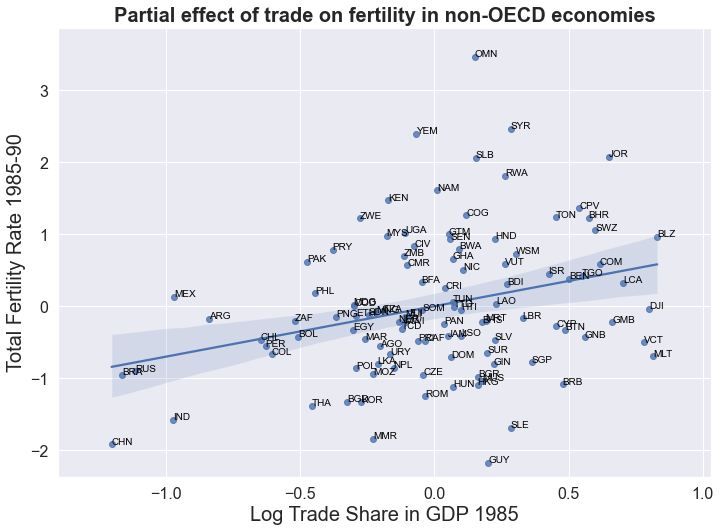

In [38]:
 # set figure size:
sns.set(rc={'figure.figsize':(11.7,8.27)})          
fig1a, ax = plt.subplots()
     # set axis limits:
ax.set(ylim=(df_nonocde_nonopec.Y1nonOCDE_resid.min()-0.2, df_nonocde_nonopec.Y1nonOCDE_resid.max()+0.4))
ax.set(xlim=(df_nonocde_nonopec.Z1nonOCDE_resid.min()-0.2, df_nonocde_nonopec.Z1nonOCDE_resid.max()+0.2))
sns.regplot(x='Z1nonOCDE_resid', y='Y1nonOCDE_resid', data=df_nonocde_nonopec, ax=ax, label='LABEL')
    # Set labels and titles:
plt.xlabel('Log Trade Share in GDP 1985', fontsize=20)
plt.ylabel('Total Fertility Rate 1985-90', fontsize=20)
plt.title("Partial effect of trade on fertility in non-OECD economies", fontsize=20, weight='bold')
    # Set country tags
ax.tick_params(labelsize=16)
for line in range(0,df_nonocde_nonopec.shape[0]):
    ax.text(df_nonocde_nonopec.Z1nonOCDE_resid[line], df_nonocde_nonopec.Y1nonOCDE_resid[line], df_nonocde_nonopec.CtrCode[line], horizontalalignment='left', fontsize=10, color='black')

_Figure 1(a) shows the predicted positive effect of international trade in fertility rate in non-industrialized economies after controlling for other things that determine fertility rates and instrumenting for solving the endogeneity problems_ 

In [39]:
    #Column 8 - For OECD Countries

    # Recall the following commented command was executed for generating table 1 col 8: 
    #df_ocde_nonopec['predicted_lntrade_1_8'] = fstStage_col8_table1.predict()
        #Then, the variable 'predicted_lntrade_1_8' is the prediction of the first stage
Z1_OECD_nonopec  = smf.ols(formula='predicted_lntrade_1_8 ~ logrgdppc1985 + infmort85', data=df_ocde_nonopec).fit()         
df_ocde_nonopec['Z1OCDE_controls'] = Z1_OECD_nonopec.predict()

df_ocde_nonopec['Z1OCDE_resid'] = Z1_OECD_nonopec.resid

In [40]:
Y_controls_OECD_f1 = smf.ols(formula='totalfert85 ~ logrgdppc1985 + infmort85', data=df_ocde_nonopec).fit()
df_ocde_nonopec['Y1OCDE_resid'] = Y_controls_OECD_f1.resid

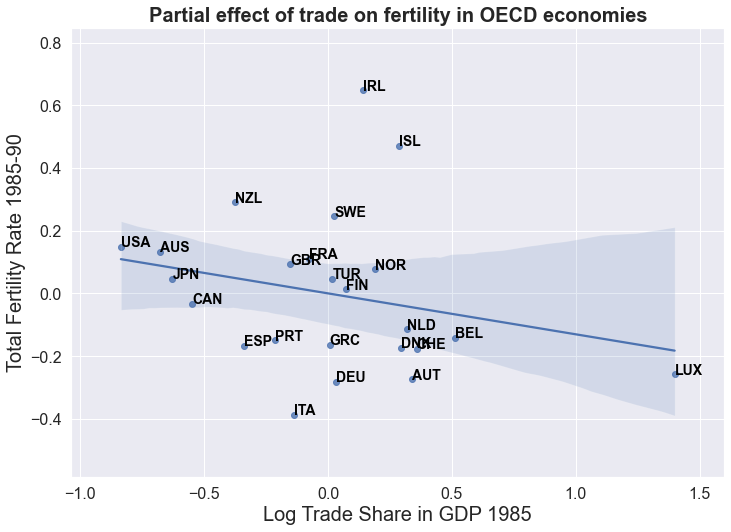

In [41]:
fig1b, ax = plt.subplots()
ax.set(ylim=(df_ocde_nonopec.Y1OCDE_resid.min()-0.2, df_ocde_nonopec.Y1OCDE_resid.max()+0.2))
ax.set(xlim=(df_ocde_nonopec.Z1OCDE_resid.min()-0.2, df_ocde_nonopec.Z1OCDE_resid.max()+0.2))
sns.regplot(x='Z1OCDE_resid', y='Y1OCDE_resid', data=df_ocde_nonopec, ax=ax, label='LABEL')
plt.xlabel('Log Trade Share in GDP 1985', fontsize=20)
plt.ylabel('Total Fertility Rate 1985-90', fontsize=20)
plt.title("Partial effect of trade on fertility in OECD economies", fontsize=20, weight='bold')
ax.tick_params(labelsize=16)
for line in range(0,df_ocde_nonopec.shape[0]):
    ax.text(df_ocde_nonopec.Z1OCDE_resid[line], df_ocde_nonopec.Y1OCDE_resid[line], df_ocde_nonopec.CtrCode[line], horizontalalignment='left', fontsize=14, color='black', weight='semibold')


_Figure 1(b) shows the predicted negative effect of international trade in fertility rate in industrialized economies after controlling for other things that determine fertility rates. Just like theory predits, after  instrumenting for solving the endogeneity The effect of trade in fertility rates is the opposite in industrialized versus non industrialized economies._ 

**Notes on IV regressions:**
Columns 3,4,7 and 8 of table 1 can be replicated using a direct command that computes de 2SLS (IV procedure). The reason why I did it in two stages is for me to predict the residuals to generate the figure 1. However, here you can find the code using ``linearmodels`` package that's easier to instrument and get done the regression.

In [42]:
    #Column 3
formula = 'totalfert85 ~ 1 + logrgdppc1985 [logactualtrade ~ logfrankrom]'
#mod = IV2SLS.from_formula(formula, data=Data.loc[(Data.oecd85 == 0) & (Data.opec85 == 0)]) 
model13 = IV2SLS.from_formula(formula, data=df_nonocde_nonopec)
iv_col3_table1 = model13.fit(cov_type='robust')
print(iv_col3_table1)

                          IV-2SLS Estimation Summary                          
Dep. Variable:            totalfert85   R-squared:                      0.5502
Estimator:                    IV-2SLS   Adj. R-squared:                 0.5417
No. Observations:                 108   F-statistic:                    147.01
Date:                Fri, Jun 26 2020   P-value (F-stat)                0.0000
Time:                        22:41:25   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
Intercept          15.403     1.2936     11.907     0.0000      12.867      17.938
logrgdppc1985     -1.7896     0.1477

In [43]:
   #Column 4
formula = 'totalfert85 ~ 1 + logrgdppc1985 + infmort85 [logactualtrade ~ logfrankrom]'
model14 = IV2SLS.from_formula(formula, data=df_nonocde_nonopec) 
iv_col4_table1 = model14.fit(cov_type='robust')
print(iv_col4_table1)

                          IV-2SLS Estimation Summary                          
Dep. Variable:            totalfert85   R-squared:                      0.7078
Estimator:                    IV-2SLS   Adj. R-squared:                 0.6993
No. Observations:                 108   F-statistic:                    352.59
Date:                Fri, Jun 26 2020   P-value (F-stat)                0.0000
Time:                        22:41:26   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
Intercept          3.0929     2.4138     1.2814     0.2001     -1.6380      7.8239
logrgdppc1985     -0.4400     0.2545

In [44]:
    #Column 7
formula = 'totalfert85 ~ 1 + logrgdppc1985 [logactualtrade ~ logfrankrom]'
model17 = IV2SLS.from_formula(formula, data=df_ocde_nonopec)
iv_col7_table1 = model17.fit(cov_type='robust')
print(iv_col7_table1)

                          IV-2SLS Estimation Summary                          
Dep. Variable:            totalfert85   R-squared:                      0.2730
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2037
No. Observations:                  24   F-statistic:                    7.2217
Date:                Fri, Jun 26 2020   P-value (F-stat)                0.0270
Time:                        22:41:26   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
Intercept          7.6287     3.1779     2.4006     0.0164      1.4001      13.857
logrgdppc1985     -0.5299     0.3193

In [45]:
    #Column 8
formula = 'totalfert85 ~ 1 + logrgdppc1985 + infmort85 [logactualtrade ~ logfrankrom]'
model18 = IV2SLS.from_formula(formula, data=df_ocde_nonopec)
iv_col8_table1 = model18.fit(cov_type='robust')
print(iv_col8_table1)

                          IV-2SLS Estimation Summary                          
Dep. Variable:            totalfert85   R-squared:                      0.6039
Estimator:                    IV-2SLS   Adj. R-squared:                 0.5445
No. Observations:                  24   F-statistic:                    473.07
Date:                Fri, Jun 26 2020   P-value (F-stat)                0.0000
Time:                        22:41:26   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
Intercept          1.0549     2.2267     0.4738     0.6357     -3.3093      5.4191
logrgdppc1985      0.1045     0.2309

### Table 2: The Effect of Trade on Education

    Here the authors want to see the effect of trade on education
    
The fisrt four estimations are for non-OECD countries and what is expected is to find that _the effect of international trade on the demand for human capital induces a decline in human capital formation in non-industrial economies._

The latter four columns are for OECD countries and _the expected effect of trade in fertility rates is, according to the theory, the opposite one, that is international trade on the demand for human capital cause the average education years to rise._

In [46]:
    # Column 1
                #For non industrialized economies
        #Regress the capital accummulation between 1985 -1990 (measured as years of school)
        #upon the logarithm of trade and controlling for GDP per capita
col1_table2 = smf.ols(formula='D_educy ~ logactualtrade + logrgdppc1985', data=dfeduc_nonocde_nonopec).fit(cov_type='HC1')
                # In a variable called "col1_table2" save the results of the regression of capital accumulation (D_educy)
                # upon trade and GDP per capita using robust estimators.
                # The data used here, is the subgroup of data for non-ocde countries and excluding OPEC members to
                # There are lese observations than in table 1 since there are some missings. 
  
        # The following command allow us to se the ANOVA table with the results of the main tests for the regression
col1_table2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.027   
Dependent Variable: D_educy          AIC:                108.5507
Date:               2020-06-26 22:41 BIC:                115.4629
No. Observations:   74               Log-Likelihood:     -51.275 
Df Model:           2                F-statistic:        2.933   
Df Residuals:       71               Prob (F-statistic): 0.0597  
R-squared:          0.054            Scale:              0.24398 
-----------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-----------------------------------------------------------------
Intercept          -0.2687   0.5263 -0.5106 0.6096 -1.3002 0.7628
logactualtrade     -0.0980   0.0802 -1.2220 0.2217 -0.2553 0.0592
logrgdppc1985       0.1489   0.0647  2.2992 0.0215  0.0220 0.2757
-----------------------------------------------------------------
Omnibus:              38.049       Durbin-Watson:          1.784 
Prob(Omnibus):        0.000        Jarque-Bera (JB):       84.151
Skew:                 1.815        Prob(JB):               0.000 
Kurtosis:             6.756        Condition No.:          82    
=================================================================

"""

_The results presented above predict there is a negative relation between trade and capital accumulation in non industrialized countries, just like theory suggest. However, results are not statistically significant and, just like when measuring effect of trade on fertility rates, there is potential existence of omitted variables, measurement errors, and reverse causality._ Again the Frankel and Romer(1999) instrument is used to correct for endogeneity of trade and find the causal effect suggested in the theory.

In [47]:
    #Column 2
    # Run the IV regression for non industrialized economies
fstStage_col2_table2 = smf.ols(formula='logactualtrade ~ logfrankrom + logrgdppc1985', data=dfeduc_nonocde_nonopec).fit(cov_type='HC1')
dfeduc_nonocde_nonopec['predicted_lntrade_2_2'] = fstStage_col2_table2.predict()

scdStage_2_2 = smf.ols(formula='D_educy ~ predicted_lntrade_2_2 + logrgdppc1985', data=dfeduc_nonocde_nonopec).fit(cov_type='HC1')
scdStage_2_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:                OLS               Adj. R-squared:      0.058   
Dependent Variable:   D_educy           AIC:                 106.1534
Date:                 2020-06-26 22:41  BIC:                 113.0656
No. Observations:     74                Log-Likelihood:      -50.077 
Df Model:             2                 F-statistic:         5.233   
Df Residuals:         71                Prob (F-statistic):  0.00758 
R-squared:            0.084             Scale:               0.23620 
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Intercept              0.0122   0.5685  0.0214 0.9829 -1.1021  1.1264
predicted_lntrade_2_2 -0.2662   0.1235 -2.1563 0.0311 -0.5083 -0.0242
logrgdppc1985          0.2008   0.0664  3.0237 0.0025  0.0707  0.3310
---------------------------------------------------------------------
Omnibus:                35.814        Durbin-Watson:           1.890 
Prob(Omnibus):          0.000         Jarque-Bera (JB):        73.562
Skew:                   1.746         Prob(JB):                0.000 
Kurtosis:               6.414         Condition No.:           87    
=====================================================================

"""

In [48]:
    # Column 3
              #For industrialized economies
        #Regress the capital accummulation between 1985 -1990 (measured as years of school)
        #upon the logarithm of trade and controlling for GDP per capita
col3_table2 = smf.ols(formula='D_educy ~ logactualtrade + logrgdppc1985', data=dfeduc_ocde_nonopec).fit(cov_type='HC1')
col3_table2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Ordinary least squares
================================================================
Model:              OLS              Adj. R-squared:     -0.009 
Dependent Variable: D_educy          AIC:                43.8395
Date:               2020-06-26 22:41 BIC:                47.2460
No. Observations:   23               Log-Likelihood:     -18.920
Df Model:           2                F-statistic:        4.366  
Df Residuals:       20               Prob (F-statistic): 0.0267 
R-squared:          0.083            Scale:              0.34892
----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
----------------------------------------------------------------
Intercept          1.8268   2.7864  0.6556 0.5121 -3.6346 7.2881
logactualtrade     0.2610   0.1940  1.3448 0.1787 -0.1194 0.6413
logrgdppc1985     -0.2627   0.2462 -1.0672 0.2859 -0.7453 0.2198
----------------------------------------------------------------
Omnibus:             24.810       Durbin-Watson:          2.109 
Prob(Omnibus):       0.000        Jarque-Bera (JB):       38.503
Skew:                2.124        Prob(JB):               0.000 
Kurtosis:            7.705        Condition No.:          268   
================================================================

"""

_The results presented above predict there is a positive relation between trade and capital accumulation in industrialized countries, just contrary to the effect of non-OECD countries and like theory suggest._ Note that again, results are not statistically significant and again the Frankel and Romer(1999) instrument is used to correct for endogeneity of trade and find the causal effect suggested in the theory.

In [49]:
    #Column 4
    # Run the IV regression for OEDC countries
fstStage_col4_table2 = smf.ols(formula='logactualtrade ~ logfrankrom + logrgdppc1985', data=dfeduc_ocde_nonopec).fit(cov_type='HC1')
dfeduc_ocde_nonopec['predicted_lntrade_4_2'] = fstStage_col4_table2.predict()

scdStage_4_2 = smf.ols(formula='D_educy ~ predicted_lntrade_4_2 + logrgdppc1985', data=dfeduc_ocde_nonopec).fit(cov_type='HC1')
scdStage_4_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:                OLS               Adj. R-squared:      0.008  
Dependent Variable:   D_educy           AIC:                 43.4391
Date:                 2020-06-26 22:41  BIC:                 46.8455
No. Observations:     23                Log-Likelihood:      -18.720
Df Model:             2                 F-statistic:         6.265  
Df Residuals:         20                Prob (F-statistic):  0.00772
R-squared:            0.098             Scale:               0.34290
--------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
--------------------------------------------------------------------
Intercept              1.3830   2.8646  0.4828 0.6293 -4.2316 6.9975
predicted_lntrade_4_2  0.3510   0.2035  1.7248 0.0846 -0.0479 0.7499
logrgdppc1985         -0.2547   0.2492 -1.0222 0.3067 -0.7432 0.2337
--------------------------------------------------------------------
Omnibus:               25.575        Durbin-Watson:           2.051 
Prob(Omnibus):         0.000         Jarque-Bera (JB):        41.019
Skew:                  2.173         Prob(JB):                0.000 
Kurtosis:              7.890         Condition No.:           275   
====================================================================

"""

## Compile in one table

In [50]:
table2 = Stargazer([col1_table1, col2_table1, scdStage_1_3, scdStage_1_4, col5_table1, col6_table1, scdStage_1_7, scdStage_1_8])
table2.significant_digits(2)
table1.render_latex()

'\\begin{table}[!htbp] \\centering\n  \\label{}\n\\begin{tabular}{@{\\extracolsep{5pt}}lcc}\n\\\\[-1.8ex]\\hline\n\\hline \\\\[-1.8ex]\n& \\multicolumn{8}{c}{\\textit{Dependent variable:}} \\\n\\cr \\cline{8-9}\n\\\\[-1.8ex] & (1) & (2) & (3) & (4) & (5) & (6) & (7) & (8) \\\\\n\\hline \\\\[-1.8ex]\n Intercept & 16.39$^{***}$ & 4.28$^{*}$ & 15.4$^{***}$ & 3.09$^{}$ & 7.18$^{**}$ & 0.36$^{}$ & 7.63$^{**}$ & 1.05$^{}$ \\\\\n  & (1.14) & (2.34) & (1.25) & (2.49) & (3.51) & (2.13) & (3.44) & (2.31) \\\\\n  & & & & & & & & \\\\\n infmort85 & & 0.03$^{***}$ & & 0.03$^{***}$ & & 0.03$^{***}$ & & 0.03$^{***}$ \\\\\n  & & (0.0) & & (0.0) & & (0.01) & & (0.01) \\\\\n  & & & & & & & & \\\\\n logactualtrade & 0.21$^{}$ & 0.33$^{**}$ & & & -0.12$^{}$ & -0.04$^{}$ & & \\\\\n  & (0.17) & (0.14) & & & (0.1) & (0.09) & & \\\\\n  & & & & & & & & \\\\\n logrgdppc1985 & -1.66$^{***}$ & -0.39$^{}$ & -1.79$^{***}$ & -0.44$^{*}$ & -0.53$^{}$ & 0.14$^{}$ & -0.53$^{}$ & 0.1$^{}$ \\\\\n  & (0.14) & (0.27) & (0.

## Figure 2

To see the partial effect of trade on education, we need to generate the residuals of the first stage instrumented variable upon controls, and the residuals of the dependend variable just regressed on controls. Just like in figure 1, but with capital accumulation instead of fertility rates.

#### Figure 2 (a)

In [51]:
    #Column 2 - For non-OCD Countries

    # Recall the following commented command was executed for generating table 2 col 2: 
            # df_nonocde_nonopec['predicted_lntrade_2_2'] = fstStage_col2_table2.predict()
    #Then, the variable 'predicted_lntrade_2_2' is the prediction of the first stage
Z2_nonOECD_nonopec  = smf.ols(formula='predicted_lntrade_2_2 ~ logrgdppc1985', data=dfeduc_nonocde_nonopec).fit()         
dfeduc_nonocde_nonopec['Z2nonOCDE_controls'] = Z2_nonOECD_nonopec.predict()

             # From that same regression calculate the residuals and save them to:
dfeduc_nonocde_nonopec['Z2nonOCDE_resid'] = Z2_nonOECD_nonopec.resid


In [52]:
Y_controls_nonOECD_f2 = smf.ols(formula='D_educy ~ logrgdppc1985', data=dfeduc_nonocde_nonopec).fit()
dfeduc_nonocde_nonopec['Y2nonOCDE_resid'] = Y_controls_nonOECD_f2.resid

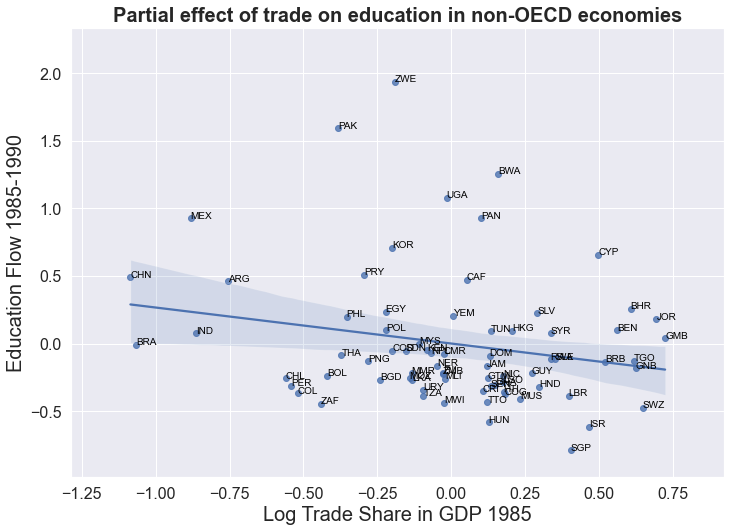

In [53]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig2a, ax = plt.subplots()
ax.set(ylim=(dfeduc_nonocde_nonopec.Y2nonOCDE_resid.min()-0.2, dfeduc_nonocde_nonopec.Y2nonOCDE_resid.max()+0.4))
ax.set(xlim=(dfeduc_nonocde_nonopec.Z2nonOCDE_resid.min()-0.2, dfeduc_nonocde_nonopec.Z2nonOCDE_resid.max()+0.2))
sns.regplot(x='Z2nonOCDE_resid', y='Y2nonOCDE_resid', data=dfeduc_nonocde_nonopec, ax=ax, label='LABEL')
plt.xlabel('Log Trade Share in GDP 1985', fontsize=20)
plt.ylabel('Education Flow 1985-1990', fontsize=20)
plt.title("Partial effect of trade on education in non-OECD economies", fontsize=20, weight='bold')
ax.tick_params(labelsize=16)
for line in range(0,dfeduc_nonocde_nonopec.shape[0]):
    ax.text(dfeduc_nonocde_nonopec.Z2nonOCDE_resid[line], dfeduc_nonocde_nonopec.Y2nonOCDE_resid[line], dfeduc_nonocde_nonopec.CtrCode[line], horizontalalignment='left', fontsize=10, color='black')

#### Figure 2 (b)

In [54]:
    #Column 4 - For OECD Countries

    # Recall the following commented command was executed for generating table 2 col 4: 
    #df_ocde_nonopec['predicted_lntrade_4_2'] = fstStage_col4_table2.predict()
        #Then, the variable 'predicted_lntrade_4_2' is the prediction of the first stage
Z2_OECD_nonopec  = smf.ols(formula='predicted_lntrade_4_2 ~ logrgdppc1985', data=dfeduc_ocde_nonopec).fit()         
dfeduc_ocde_nonopec['Z2OCDE_controls'] = Z2_OECD_nonopec.predict()

dfeduc_ocde_nonopec['Z2OCDE_resid'] = Z2_OECD_nonopec.resid

In [55]:
Y_controls_OECD_f2 = smf.ols(formula='D_educy ~ logrgdppc1985', data=dfeduc_ocde_nonopec).fit()
dfeduc_ocde_nonopec['Y2OCDE_resid'] = Y_controls_OECD_f2.resid

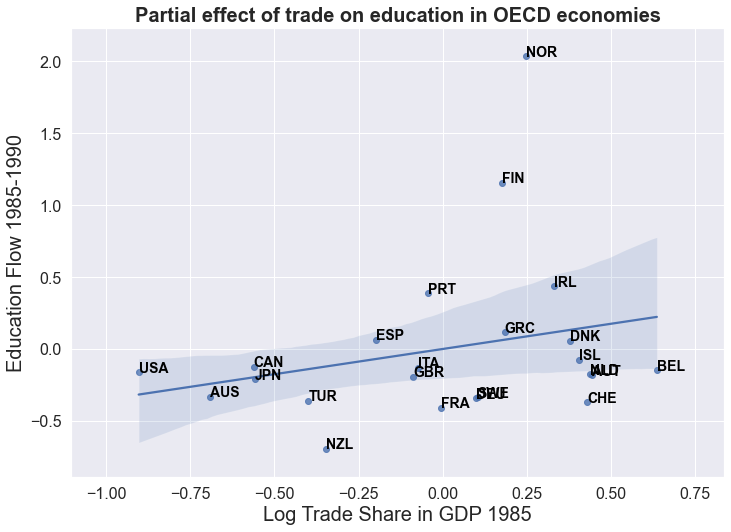

In [56]:
fig2b, ax = plt.subplots()
ax.set(ylim=(dfeduc_ocde_nonopec.Y2OCDE_resid.min()-0.2, dfeduc_ocde_nonopec.Y2OCDE_resid.max()+0.2))
ax.set(xlim=(dfeduc_ocde_nonopec.Z2OCDE_resid.min()-0.2, dfeduc_ocde_nonopec.Z2OCDE_resid.max()+0.2))
sns.regplot(x='Z2OCDE_resid', y='Y2OCDE_resid', data=dfeduc_ocde_nonopec, ax=ax, label='LABEL')
plt.xlabel('Log Trade Share in GDP 1985', fontsize=20)
plt.ylabel('Education Flow 1985-1990', fontsize=20)
plt.title("Partial effect of trade on education in OECD economies", fontsize=20, weight='bold')
ax.tick_params(labelsize=16)
for line in range(0,dfeduc_ocde_nonopec.shape[0]):
    ax.text(dfeduc_ocde_nonopec.Z2OCDE_resid[line], dfeduc_ocde_nonopec.Y2OCDE_resid[line], dfeduc_ocde_nonopec.CtrCode[line], horizontalalignment='left', fontsize=14, color='black', weight='semibold')


_Figure 2 shows the predicted negative(positive) effect of international trade capital accumulation in (non)industrialized economies after controlling for DGP per capita. Just like theory predicts, after  instrumenting for solving the endogeneity The effect of trade in capital formation is the opposite in industrialized versus non industrialized economies and suggesting there might be a perpetual divergence._ 

# Robustness

In this section, authors make various robustness checks to prove that their results also hold using similar variables and model specifications.
In this models, the complete sample is used and the differences between industrialized and non-industrialized economies is captured using a dummy variable.

## Fertility and Trade
### Table 3

The following regression summarizes the complete model form used for robustness check

In [57]:
%%latex
\begin{equation}
TFR_{i}=\beta_{0}+\beta_{1}ln(trade/GDP)_{i}+\beta_{2}lnGDP_{i}+\beta_{3}m{i}+\beta_{4}D{i}+\beta_{5}D_{i}*lnGDP_{i}+\beta_{6}D_{i}GDP_{i}+\beta_{7}D{i}m{i}+\epsilon_{i}
\end{equation}

<IPython.core.display.Latex object>

In [58]:
%%latex
Where $𝑇𝐹𝑅𝑖$ is the average total fertility rate in the period 1985-1990. in economy $i$ regressed on:\\
    \begin{itemize}
        \item log share of trade in GDP in 1985 $ln(trade/GDP)_i$, instrumentedby the Frankel–Romer instrument for trade
        \item $lnGDP_i$ log GDP per capita in 1985
        \item $m_i$ infant mortality rate in 1985
        \item a dummy variable, $D_i$, which equals 1 if economy i is an OECD economy and 0 otherwise
        \item the interactions between the OECD dummy, $D_i$ and $ln(trade/GDP)_i$,$GDP_i$, $m_i$
\end{itemize}

<IPython.core.display.Latex object>

Results are shown in **Table 3**:

Column (1) displays the results of the effect of the log of the share of trade in GDP in 1985 on the average Total Fertility Rate in the period 1985–1990 in the entire sample with some additional controls of what is used in table 1 as explained above.

Column (2) include continental dummies, column (3) includes the OPEC economies, column (4) excludes Eastern European Economies, column (5) Exclude some outliers.

Columns (6) and (7) extend the time window to see if the effect still holds for other years. 

Finally, column(8) uses a different dependent variable: average Cruth Birth Rate from 1985-1900.


In [59]:
    #Table 3 Column 1
formula1 = 'totalfert85 ~ 1 + intlogrgdppc1985 + logrgdppc1985 + infmort85 + intinfmort85 + oecd85  [logactualtrade + intlogactualtrade ~ logfrankrom + intlogfrankrom]'
mod1 = IV2SLS.from_formula(formula1, data=Data.loc[Data.opec85 == 0]) 
iv_res1 = mod1.fit(cov_type='robust')
#print(iv_res1)

In [105]:
    #Table 3 Column 2
formula2 = 'totalfert85 ~ 1 + oecd85 + logrgdppc1985 + intlogrgdppc1985 + infmort85 + intinfmort85 + africa + asia + europe + america [logactualtrade + intlogactualtrade ~ logfrankrom + intlogfrankrom]'
        #PLEASE SEE THE NOTE BELLOW
mod2 = IV2SLS.from_formula(formula2, data=Data.loc[Data.opec85 == 0]) 
iv_res2 = mod2.fit(cov_type='robust')
print(iv_res2)


                          IV-2SLS Estimation Summary                          
Dep. Variable:            totalfert85   R-squared:                      0.8208
Estimator:                    IV-2SLS   Adj. R-squared:                 0.8043
No. Observations:                 132   F-statistic:                    1557.3
Date:                Fri, Jun 26 2020   P-value (F-stat)                0.0000
Time:                        22:55:03   Distribution:                 chi2(11)
Cov. Estimator:                robust                                         
                                                                              
                                 Parameter Estimates                                 
                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------
Intercept             3.1959     2.2480     1.4217     0.1551     -1.2101      7.6019
oecd85               -1.

# COLINEARITY

**NOTE** I find that there is COLINEARITY in the regression, that's why I can not include all the dummies. The Stata file does run, and shows the results presented in the paper, but in  Python this is not the case. This makes me realize that they were including all the dummys in their regression and not having a baseline condition. (You let out one dummy to compare the effect upon not being in that group).

In [61]:
    #Table 3 column 3 
mod3 = IV2SLS.from_formula(formula1, data=Data) 
iv_res3 = mod3.fit(cov_type='robust')
#print(iv_res3)

In [62]:
    #Table 3 column 4 
mod4 = IV2SLS.from_formula(formula1, data=Data.loc[(Data.opec85 == 0) & (Data.easteur == 0)]) 
iv_res4 = mod4.fit(cov_type='robust')
#print(iv_res4)

There is an obvious outlier: Luxemburgo (This can be seen in figure 1 (b))

In [63]:
    #Create a base that excludes Luxemburg and OPEC members
df_table3col5 = Data.loc[(Data.opec85 == 0) & (Data.CtrCode!="LUX")].reset_index(drop=True)

In [64]:
    #Table 3 column 5 
mod5 = IV2SLS.from_formula(formula1, data=df_table3col5) 
iv_res5 = mod5.fit(cov_type='robust')
#print(iv_res5)



In [65]:
    #Table 3 Column 6
formula6 = 'totalfert8590 ~ 1 + intlogrgdppc1985 + logrgdppc1985 + infmort85 + intinfmort85 + oecd85  [logactualtrade + intlogactualtrade ~ logfrankrom + intlogfrankrom]'    
mod6 = IV2SLS.from_formula(formula6, data=Data.loc[Data.opec85 == 0]) 
iv_res6 = mod6.fit(cov_type='robust')
#print(iv_res6)

In [66]:
    #Table 3 Column 7
formula7 = 'totalfert8595 ~ 1 + intlogrgdppc1985 + logrgdppc1985 + infmort85 + intinfmort85 + oecd85  [logactualtrade + intlogactualtrade ~ logfrankrom + intlogfrankrom]'
mod7 = IV2SLS.from_formula(formula7, data=Data.loc[Data.opec85 == 0]) 
iv_res7 = mod7.fit(cov_type='robust')
#print(iv_res7)

In [67]:
    #Table 3 Column 8
formula8 = 'crudebirth85 ~ 1 + intlogrgdppc1985 + logrgdppc1985 + infmort85 + intinfmort85 + oecd85  [logactualtrade + intlogactualtrade ~ logfrankrom + intlogfrankrom]'
mod8 = IV2SLS.from_formula(formula8, data=Data.loc[Data.opec85 == 0]) 
iv_res8 = mod8.fit(cov_type='robust')
#print(iv_res8)

In [68]:
res = OrderedDict()
res['(1)85-90'] = iv_res1
res['(2)85-90'] = iv_res2
res['(3)85-90'] = iv_res3
res['(4)85-90'] = iv_res4
print(compare(res))

                                     Model Comparison                                    
                              (1)85-90         (2)85-90         (3)85-90         (4)85-90
-----------------------------------------------------------------------------------------
Dep. Variable              totalfert85      totalfert85      totalfert85      totalfert85
Estimator                      IV-2SLS          IV-2SLS          IV-2SLS          IV-2SLS
No. Observations                   132              132              144              126
Cov. Est.                       robust           robust           robust           robust
R-squared                       0.8060           0.8208           0.7696           0.8019
Adj. R-squared                  0.7951           0.8043           0.7578           0.7902
F-statistic                     1651.3           1557.3           1540.9           1699.0
P-value (F-stat)                0.0000           0.0000           0.0000           0.0000
==========

In [69]:
res = OrderedDict()
res['(5)85-90'] = iv_res5
res['(6)85-95'] = iv_res6
res['(7)85-00'] = iv_res7
res['(8)85-90'] = iv_res8
print(compare(res))

                                      Model Comparison                                     
                              (5)85-90          (6)85-95          (7)85-00         (8)85-90
-------------------------------------------------------------------------------------------
Dep. Variable              totalfert85     totalfert8590     totalfert8595     crudebirth85
Estimator                      IV-2SLS           IV-2SLS           IV-2SLS          IV-2SLS
No. Observations                   131               132               132              132
Cov. Est.                       robust            robust            robust           robust
R-squared                       0.8033            0.8220            0.8338           0.8531
Adj. R-squared                  0.7921            0.8120            0.8244           0.8448
F-statistic                     1779.5            1601.0            1641.4           1971.2
P-value (F-stat)                0.0000            0.0000            0.0000      

## Human Capital Formation and Trade
### Table 4

The following regression summarizes the complete model form used for robustness check

In [70]:
%%latex
\begin{equation}
HC_{i}=\beta_{0}+\beta_{1}ln(trade/GDP)_{i}+\beta_{2}lnGDP_{i}+\beta_{3}D{i}+\beta_{4}D_{i}*lnGDP_{i}+\beta_{6}D_{i}ln(trade/GDP)_{i}+\mu_{i}
\end{equation}

<IPython.core.display.Latex object>

In [71]:
%%latex
Where $HC𝑖$  is the change in the years of education of the population, above 15, in the period 1985–1990 in economy $i$ regressed on:\\
    \begin{itemize}
        \item log share of trade in GDP in 1985 $ln(trade/GDP)_i$, instrumentedby the Frankel–Romer instrument for trade
        \item $lnGDP_i$ log GDP per capita in 1985
        \item a dummy variable, $D_i$, which equals 1 if economy i is an OECD economy and 0 otherwise
        \item the interactions between the OECD dummy, $D_i$ and $ln(trade/GDP)_i$,$GDP_i$, $m_i$
\end{itemize}

<IPython.core.display.Latex object>

Results are shown in **Table 4**:

Column (1) displays the results of the effect of the log of the share of trade in GDP in 1985 on the years of education in the period 1985–1990 in the entire sample with some additional controls of what is used in table 1 as explained above.

Column (2) include continental dummies, column (3) includes the OPEC economies, column (4) excludes Eastern European Economies, column (5) Exclude some outliers.

Columns (6) and (7) extend the time window to see if the effect still holds for other years in sample. 

Finally, column(8) uses a different dependent variable: average years of primary education 1985-1900.




In [72]:
    #Table 4 Column 1
formula41 = 'D_educy ~ 1 + intlogrgdppc1985 + logrgdppc1985 + oecd85  [logactualtrade + intlogactualtrade ~ logfrankrom + intlogfrankrom]'
mod41 = IV2SLS.from_formula(formula41, data=df_educ.loc[df_educ.opec85 == 0]) 
iv_res41 = mod41.fit(cov_type='robust')
print(iv_res41)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                D_educy   R-squared:                      0.0304
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0234
No. Observations:                  96   F-statistic:                    22.293
Date:                Fri, Jun 26 2020   P-value (F-stat)                0.0005
Time:                        22:41:36   Distribution:                  chi2(5)
Cov. Estimator:                robust                                         
                                                                              
                                 Parameter Estimates                                 
                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------
Intercept             0.0052     0.5711     0.0090     0.9928     -1.1143      1.1246
intlogrgdppc1985     -0.

In [104]:
    #Table 4 Column 2
formula42 = 'D_educy ~ 1 + intlogrgdppc1985 + logrgdppc1985 + oecd85 + africa + asia + europe + america [logactualtrade + intlogactualtrade ~ logfrankrom + intlogfrankrom]'
mod42 = IV2SLS.from_formula(formula42, data=df_educ.loc[df_educ.opec85 == 0]) 
iv_res42 = mod42.fit(cov_type='robust')
print(iv_res42)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                D_educy   R-squared:                      0.0366
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0642
No. Observations:                  96   F-statistic:                    30.207
Date:                Fri, Jun 26 2020   P-value (F-stat)                0.0004
Time:                        22:52:32   Distribution:                  chi2(9)
Cov. Estimator:                robust                                         
                                                                              
                                 Parameter Estimates                                 
                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------
Intercept            -0.5210     0.7107    -0.7331     0.4635     -1.9140      0.8719
intlogrgdppc1985     -0.

In [74]:
    #Table 4 Column 3
mod43 = IV2SLS.from_formula(formula41, data=df_educ) 
iv_res43 = mod43.fit(cov_type='robust')
print(iv_res43)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                D_educy   R-squared:                      0.0348
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0149
No. Observations:                 103   F-statistic:                    15.708
Date:                Fri, Jun 26 2020   P-value (F-stat)                0.0077
Time:                        22:41:37   Distribution:                  chi2(5)
Cov. Estimator:                robust                                         
                                                                              
                                 Parameter Estimates                                 
                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------
Intercept             0.0185     0.5422     0.0340     0.9729     -1.0443      1.0812
intlogrgdppc1985     -0.

In [75]:
    #Table 4 Column 4
mod44 = IV2SLS.from_formula(formula41, data=df_educ.loc[(df_educ.opec85 == 0) & (df_educ.easteur==0)]) 
iv_res44 = mod44.fit(cov_type='robust')
print(iv_res44)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                D_educy   R-squared:                      0.0355
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0193
No. Observations:                  94   F-statistic:                    22.416
Date:                Fri, Jun 26 2020   P-value (F-stat)                0.0004
Time:                        22:41:37   Distribution:                  chi2(5)
Cov. Estimator:                robust                                         
                                                                              
                                 Parameter Estimates                                 
                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------
Intercept            -0.0938     0.5719    -0.1639     0.8698     -1.2146      1.0271
intlogrgdppc1985     -0.

There are two outliers in this case, as suggested by figure 2 (b), those are Norway and Finland

In [76]:
    #Create a base that excludes Norway and Finland and OPEC members
df_table4col5 = df_educ.loc[(df_educ.opec85 == 0) & (df_educ.CtrCode!="NOR") & (df_educ.CtrCode!="FIN")].reset_index(drop=True)

In [91]:
    #Table 4 Column 5
mod45 = IV2SLS.from_formula(formula41, data=df_table4col5) 
iv_res45 = mod45.fit(cov_type='robust')
print(iv_res45)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                D_educy   R-squared:                      0.0724
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0196
No. Observations:                  94   F-statistic:                    25.682
Date:                Fri, Jun 26 2020   P-value (F-stat)                0.0001
Time:                        22:43:27   Distribution:                  chi2(5)
Cov. Estimator:                robust                                         
                                                                              
                                 Parameter Estimates                                 
                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------
Intercept             0.0052     0.5711     0.0090     0.9928     -1.1143      1.1246
intlogrgdppc1985     -0.

In [92]:
    #Table 4 Column 6
formula46 = 'D_educy95 ~ 1 + intlogrgdppc1985 + logrgdppc1985 + oecd85  [logactualtrade + intlogactualtrade ~ logfrankrom + intlogfrankrom]'
mod46 = IV2SLS.from_formula(formula46, data=df_educ.loc[df_educ.opec85 == 0]) 
iv_res46 = mod46.fit(cov_type='robust')
print(iv_res46)

                          IV-2SLS Estimation Summary                          
Dep. Variable:              D_educy95   R-squared:                      0.0551
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0026
No. Observations:                  96   F-statistic:                    54.856
Date:                Fri, Jun 26 2020   P-value (F-stat)                0.0000
Time:                        22:43:32   Distribution:                  chi2(5)
Cov. Estimator:                robust                                         
                                                                              
                                 Parameter Estimates                                 
                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------
Intercept            -0.1690     0.6492    -0.2603     0.7946     -1.4414      1.1034
intlogrgdppc1985     -0.

In [93]:
    #Table 4 Column 7
formula47 = 'D_educy99 ~ 1 + intlogrgdppc1985 + logrgdppc1985 + oecd85  [logactualtrade + intlogactualtrade ~ logfrankrom + intlogfrankrom]'
mod47 = IV2SLS.from_formula(formula46, data=df_educ.loc[df_educ.opec85 == 0]) 
iv_res47 = mod47.fit(cov_type='robust')
print(iv_res47)

                          IV-2SLS Estimation Summary                          
Dep. Variable:              D_educy95   R-squared:                      0.0551
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0026
No. Observations:                  96   F-statistic:                    54.856
Date:                Fri, Jun 26 2020   P-value (F-stat)                0.0000
Time:                        22:43:32   Distribution:                  chi2(5)
Cov. Estimator:                robust                                         
                                                                              
                                 Parameter Estimates                                 
                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------
Intercept            -0.1690     0.6492    -0.2603     0.7946     -1.4414      1.1034
intlogrgdppc1985     -0.

In [94]:
    #Table 4 Column 8
formula48 = 'D_educyprimary ~ 1 + intlogrgdppc1985 + logrgdppc1985 + oecd85  [logactualtrade + intlogactualtrade ~ logfrankrom + intlogfrankrom]'
mod48 = IV2SLS.from_formula(formula48, data=df_educ_prim.loc[df_educ_prim.opec85 == 0]) 
iv_res48 = mod48.fit(cov_type='robust')
print(iv_res48)

                          IV-2SLS Estimation Summary                          
Dep. Variable:         D_educyprimary   R-squared:                      0.0893
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0393
No. Observations:                  97   F-statistic:                    38.260
Date:                Fri, Jun 26 2020   P-value (F-stat)                0.0000
Time:                        22:43:32   Distribution:                  chi2(5)
Cov. Estimator:                robust                                         
                                                                              
                                 Parameter Estimates                                 
                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------
Intercept             0.2852     0.3814     0.7476     0.4547     -0.4624      1.0327
intlogrgdppc1985     -0.

In [95]:
    #Compile table 4:
res = OrderedDict()
res['(1)85-90'] = iv_res41
res['(2)85-90'] = iv_res44
res['(3)85-90'] = iv_res43
res['(4)85-90'] = iv_res44
print(compare(res))

                                     Model Comparison                                    
                              (1)85-90         (2)85-90         (3)85-90         (4)85-90
-----------------------------------------------------------------------------------------
Dep. Variable                  D_educy          D_educy          D_educy          D_educy
Estimator                      IV-2SLS          IV-2SLS          IV-2SLS          IV-2SLS
No. Observations                    96               94              103               94
Cov. Est.                       robust           robust           robust           robust
R-squared                       0.0304           0.0355           0.0348           0.0355
Adj. R-squared                 -0.0234          -0.0193          -0.0149          -0.0193
F-statistic                     22.293           22.416           15.708           22.416
P-value (F-stat)                0.0005           0.0004           0.0077           0.0004
==========

In [97]:
res = OrderedDict()
res['(5)85-90'] = iv_res44
res['(6)85-95'] = iv_res46
res['(7)85-99'] = iv_res47
res['(8)85-00'] = iv_res48
print(compare(res))

                                      Model Comparison                                     
                                   (5)              (6)         (7)85-99           (8)85-00
-------------------------------------------------------------------------------------------
Dep. Variable                  D_educy        D_educy95        D_educy95     D_educyprimary
Estimator                      IV-2SLS          IV-2SLS          IV-2SLS            IV-2SLS
No. Observations                    94               96               96                 97
Cov. Est.                       robust           robust           robust             robust
R-squared                       0.0355           0.0551           0.0551             0.0893
Adj. R-squared                 -0.0193           0.0026           0.0026             0.0393
F-statistic                     22.416           54.856           54.856             38.260
P-value (F-stat)                0.0004        1.397e-10        1.397e-10        